<a href="https://colab.research.google.com/github/MITXy/Machine-Learning-Models/blob/main/Insurance/Insurance_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_profiling


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
url = 'https://drive.google.com/file/d/1DmJA2zbp_GRhiXO8JWI0j1x30KN9WPdz/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
insurance = pd.read_csv(url)
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [4]:
insurance.shape

(400, 5)

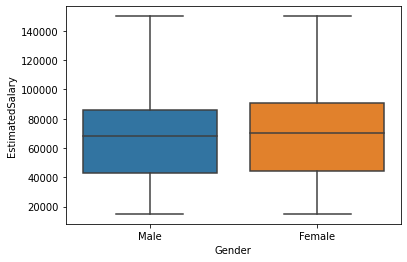

In [5]:
#Exploratory data analysis to check for clues
sns.boxplot(x = "Gender", y= "EstimatedSalary", data = insurance)
plt.show()

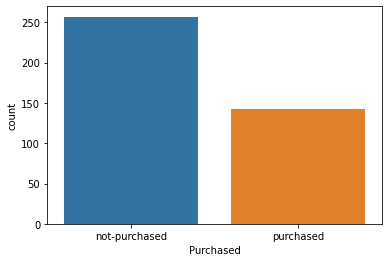

In [6]:
sns.countplot(x= "Purchased", data = insurance)

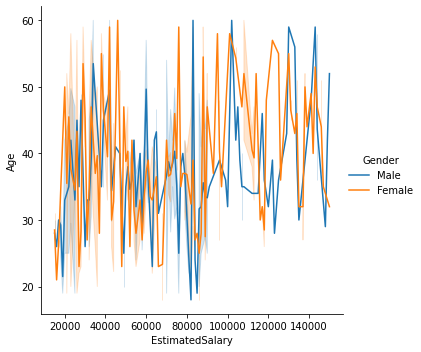

In [7]:
sns.relplot(x = "EstimatedSalary", y= "Age", kind ='line', hue ='Gender',
data = insurance)

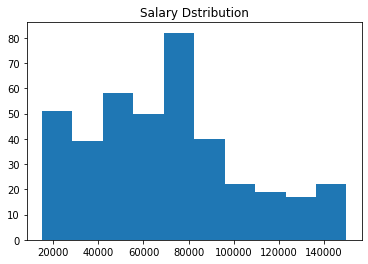

In [8]:
plt.hist(insurance['EstimatedSalary'])
plt.title("Salary Dstribution");


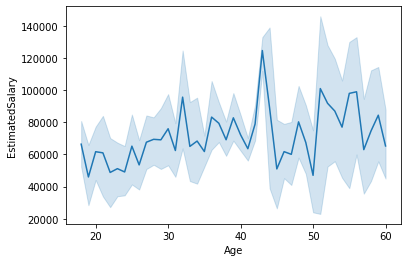

In [9]:
sns.lineplot(data = insurance, x = "Age",y = "EstimatedSalary")

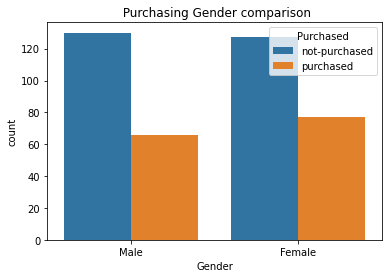

In [10]:
sns.countplot(x = "Gender", hue = "Purchased", data = insurance)
plt.title(" Purchasing Gender comparison");


In [11]:
# dropping the user ID column for data anonymisation
insurance.drop(["User ID"], axis = 'columns', inplace = True)

In [27]:
insurance

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
...,...,...,...,...
395,Female,46,41000,purchased
396,Male,51,23000,purchased
397,Female,50,20000,purchased
398,Male,36,33000,not-purchased


In [12]:
insurance["Purchased"] = insurance["Purchased"].apply(lambda x:1 if x == "purchased" else 0)
insurance

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [13]:
# Model Building
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [14]:
X = insurance.drop(["Purchased"], axis = "columns")
y = insurance['Purchased'] 

In [15]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [16]:
y.head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
Name: Purchased, dtype: int64

In [17]:
x = pd.get_dummies(X)
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [18]:
# Sampling of data 
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize the new class distribution

counter = Counter(y)
print(counter)

Counter({0: 257, 1: 257})


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
Insurancemodel  = LogisticRegression()
Insurancemodel.fit(x_train, y_train)

LogisticRegression()

In [21]:
InsurancePrediction = Insurancemodel.predict(x_test)

In [22]:
metrics.accuracy_score(y_test, InsurancePrediction)

0.4563106796116505

In [23]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

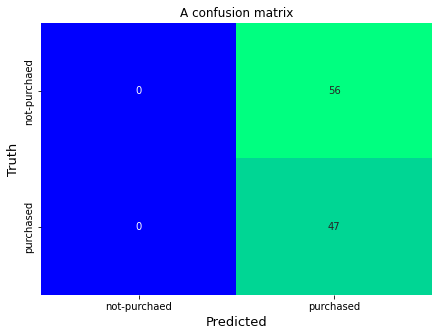

In [25]:
ConfusionMatrix(y_test, InsurancePrediction, label= ["not-purchaed", "purchased"])

In [26]:
metrics.accuracy_score(y_test, InsurancePrediction)

0.4563106796116505

In [28]:
print(metrics.classification_report(y_test, InsurancePrediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.46      1.00      0.63        47

    accuracy                           0.46       103
   macro avg       0.23      0.50      0.31       103
weighted avg       0.21      0.46      0.29       103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
rf_prediction = randomforestmodel.predict(x_test)

In [34]:
metrics.accuracy_score(y_test, rf_prediction)

0.912621359223301

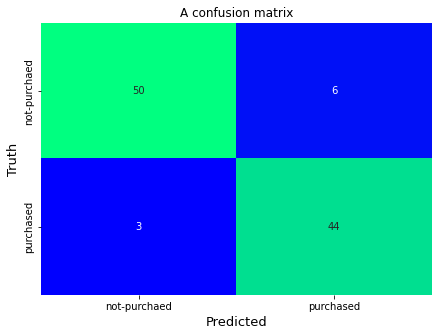

In [35]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchaed", "purchased"])

In [36]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        56
           1       0.88      0.94      0.91        47

    accuracy                           0.91       103
   macro avg       0.91      0.91      0.91       103
weighted avg       0.91      0.91      0.91       103



In [37]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier(n_estimators= 300)
randomforestmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [38]:
rf_prediction = randomforestmodel.predict(x_test)

In [39]:
metrics.accuracy_score(y_test, rf_prediction)

0.912621359223301

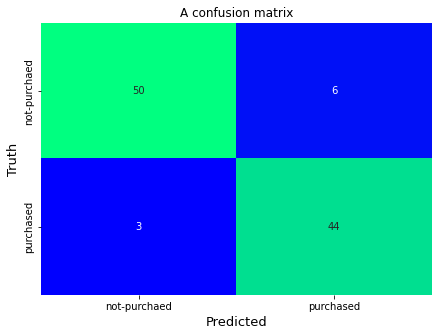

In [42]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchaed", "purchased"])

In [43]:
from sklearn.metrics import f1_score
print(f1_score(y_test, rf_prediction))

0.9072164948453608


In [44]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        56
           1       0.88      0.94      0.91        47

    accuracy                           0.91       103
   macro avg       0.91      0.91      0.91       103
weighted avg       0.91      0.91      0.91       103



In [45]:
# saving the Insurance Model that could be improved :)
import pickle
pickle_out = open("rfmodel.pkl", mode = "wb") 
pickle.dump(randomforestmodel, pickle_out) 
pickle_out.close()

In [46]:
pickle_in = open('rfmodel.pkl', 'rb') 
clf = pickle.load(pickle_in)

In [47]:
print(clf.predict([[34, 400, 1,0]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
